In [24]:
from data_loader import create_datasets, prepare_datasets

import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Model
from keras.applications import VGG16 
import os
import numpy as np
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [6]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomBrightness(factor=0.2)
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [7]:
# Load the model back in

model2 = keras.models.load_model('../../skin_cancer_model_transfer.keras')

/home/reese_quinto/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:355: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [13]:
# bring in dataset

train_dir = '../../Skin_Data/Train'
#clean_data(train_dir)  # Cleaning data
train_ds, val_ds = create_datasets(train_dir)  # Creating datasets
train_ds, val_ds = prepare_datasets(train_ds, val_ds)  # Applying data augmentation and prefetching

Found 84 files belonging to 2 classes.
Using 68 files for training.
Using 16 files for validation.


2024-05-01 05:44:32.414070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


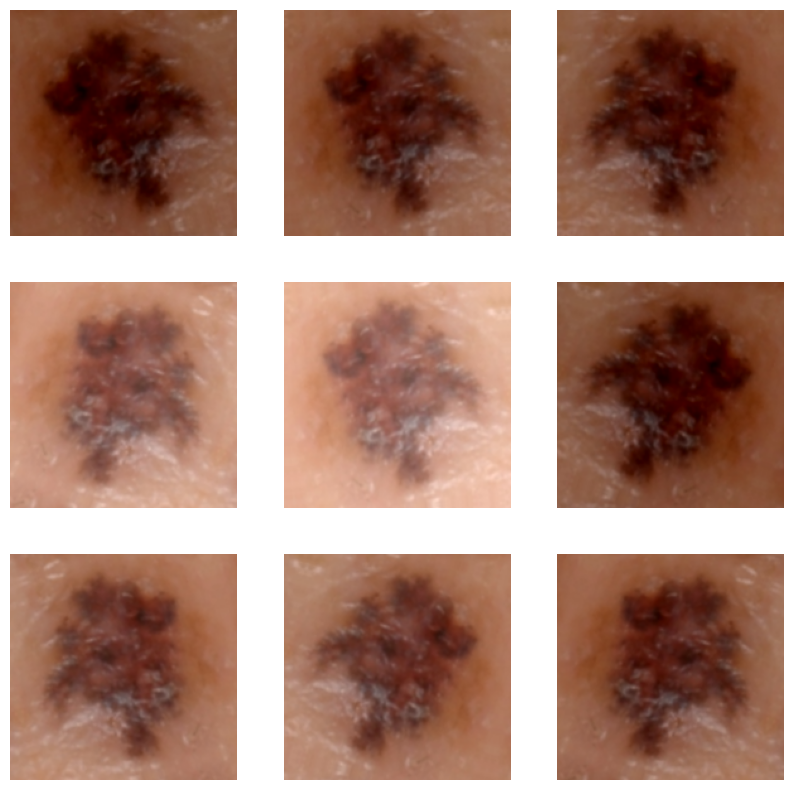

In [17]:
# Visualize some augmented samples

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [18]:
# Train the new model

epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model2.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)

history = model2.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/10


2024-05-01 05:46:43.722416: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 211507200 exceeds 10% of free system memory.
2024-05-01 05:46:44.332483: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 211507200 exceeds 10% of free system memory.
2024-05-01 05:46:44.976759: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 216233472 exceeds 10% of free system memory.
2024-05-01 05:46:55.394601: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 216233472 exceeds 10% of free system memory.
2024-05-01 05:46:55.911126: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 211507200 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 37s 37s/step - acc: 0.6912 - loss: 0.5862 - val_acc: 0.5000 - val_loss: 1.1898
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - acc: 0.5441 - loss: 1.0786 - val_acc: 0.5000 - val_loss: 1.8827
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - acc: 0.5000 - loss: 1.9059 - val_acc: 0.4375 - val_loss: 0.7432
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - acc: 0.4559 - loss: 0.8307 - val_acc: 0.5000 - val_loss: 0.7691
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - acc: 0.5147 - loss: 0.7460 - val_acc: 0.5000 - val_loss: 0.9320
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - acc: 0.5147 - loss: 1.0405 - val_acc: 0.5000 - val_loss: 0.6519
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - acc: 0.5000 - loss: 0.7173 - val_acc: 0.5000 - val_loss: 0.6445
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - acc: 0.5294 - loss: 0.6511 - val_acc: 0.5625 - val_loss: 0.6288
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - acc: 0.5441 - loss: 0.6809 - val_acc: 0.

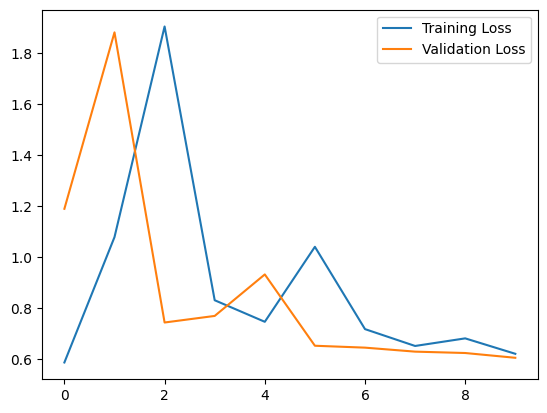

In [20]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

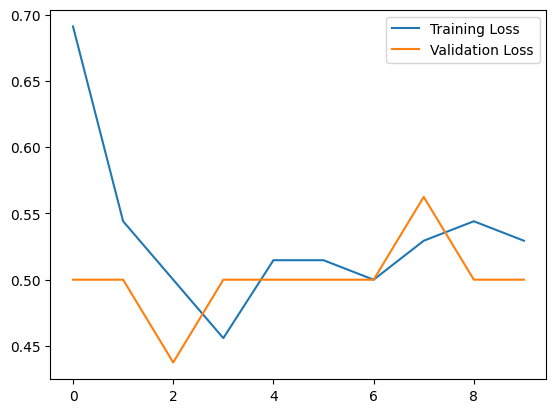

In [21]:

plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Loss")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Loss")
plt.legend()

In [22]:
# save the model
model2.save('../../skin_cancer_model_transfer.keras')